# 1. Set up env

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
match_result = pd.read_csv('eda_data/match_result.csv')
shooting = pd.read_csv('eda_data/df_shooting.csv')

In [3]:
#match_result = match_result.drop(columns=['Unnamed'])
#shooting = shooting.drop(columns=['Unnamed'])

shoot_to_result = pd.concat([match_result, shooting], axis=1)

# Thêm cột 'Win' theo điều kiện
shoot_to_result['Win'] = shoot_to_result.apply(
    lambda row: 1 if row['GF'] > row['GA'] else (0 if row['GF'] == row['GA'] else -1),
    axis=1
)

# Hiển thị kết quả
shoot_to_result.head(1)

,Unnamed: 0,Time,Team,Opponent,GF,GA,Unnamed: 0,Standard__Gls,Standard__Sh,Standard__SoT,Standard__SoT%,Standard__G/Sh,Standard__G/SoT,Standard__Dist,Standard__FK,Standard__PK,Standard__PKatt,Win
0,0,2017-08-18 20:15:00,Alaves,Leganes,0.0,1.0,0,0,8.0,4.0,50.0,0.0,0.0,22.8,0.0,0,1,-1


In [4]:
# List of shooting-related columns
shooting_columns = [
    'Standard__Gls', 'Standard__Sh', 'Standard__SoT', 'Standard__SoT%', 
    'Standard__G/Sh', 'Standard__G/SoT', 'Standard__Dist', 'Standard__FK', 
    'Standard__PK', 'Standard__PKatt'
]

# Select the relevant columns: shooting-related columns and GF/Win columns
temp_df = shoot_to_result[shooting_columns + ['GF', 'Win']]

# Calculate the correlation between the selected columns and 'GF'
correlation_shooting_GF = temp_df[shooting_columns + ['GF']].corr()

# Calculate the correlation between the selected columns and 'Win'
correlation_shooting_Win = temp_df[shooting_columns + ['Win']].corr()

# Optionally, save the correlation matrices to CSV files
#correlation_shooting_GF.to_csv('eda_data/correlation_shooting_GF.csv')
#correlation_shooting_Win.to_csv('eda_data/correlation_shooting_Win.csv')


# Distribution of Shot on Target (And %), Goal on Shot,SoT

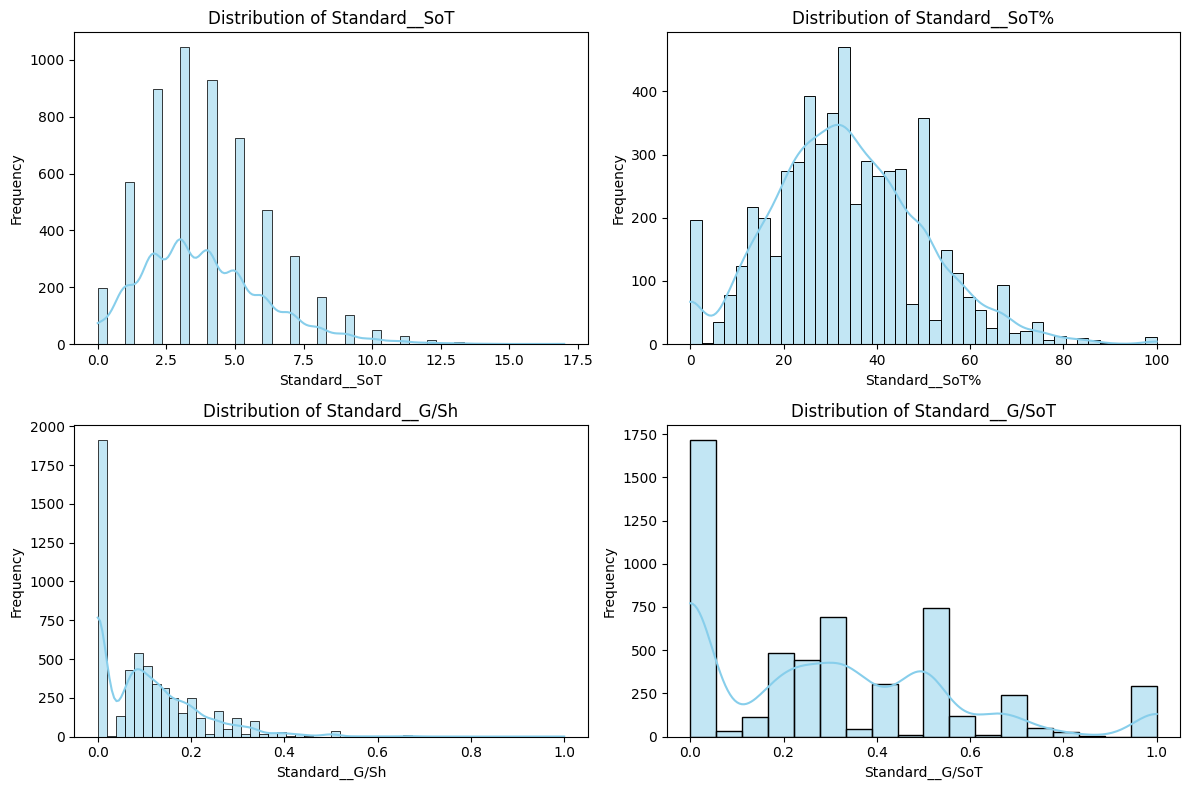

In [5]:


# List of selected variables for distribution plot
selected_columns = ['Standard__SoT', 'Standard__SoT%', 'Standard__G/Sh', 'Standard__G/SoT']

# Create a subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot the distribution of each selected variable
for i, column in enumerate(selected_columns):
    sns.histplot(temp_df[column], kde=True, ax=axes[i], color="skyblue")
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()


# Distrubution of these stats for game Win

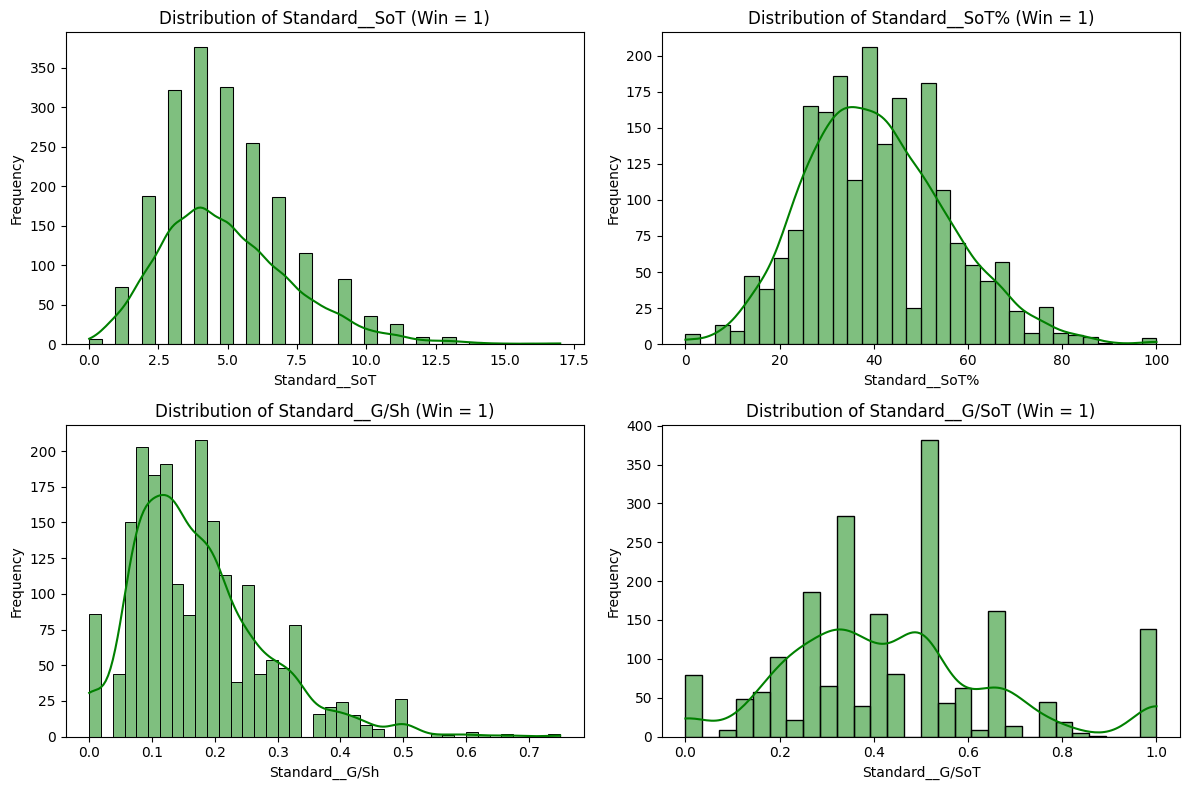

In [6]:
# Filter data for matches with Win = 1
win_matches = temp_df[temp_df['Win'] == 1]

# Create a subplot grid for Win = 1 matches
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot the distribution of each selected variable for matches with Win = 1
for i, column in enumerate(selected_columns):
    sns.histplot(win_matches[column], kde=True, ax=axes[i], color="green")
    axes[i].set_title(f"Distribution of {column} (Win = 1)")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Adjust layout for Win = 1 matches
plt.tight_layout()
plt.show()

# Distrubution of these stats for game not win

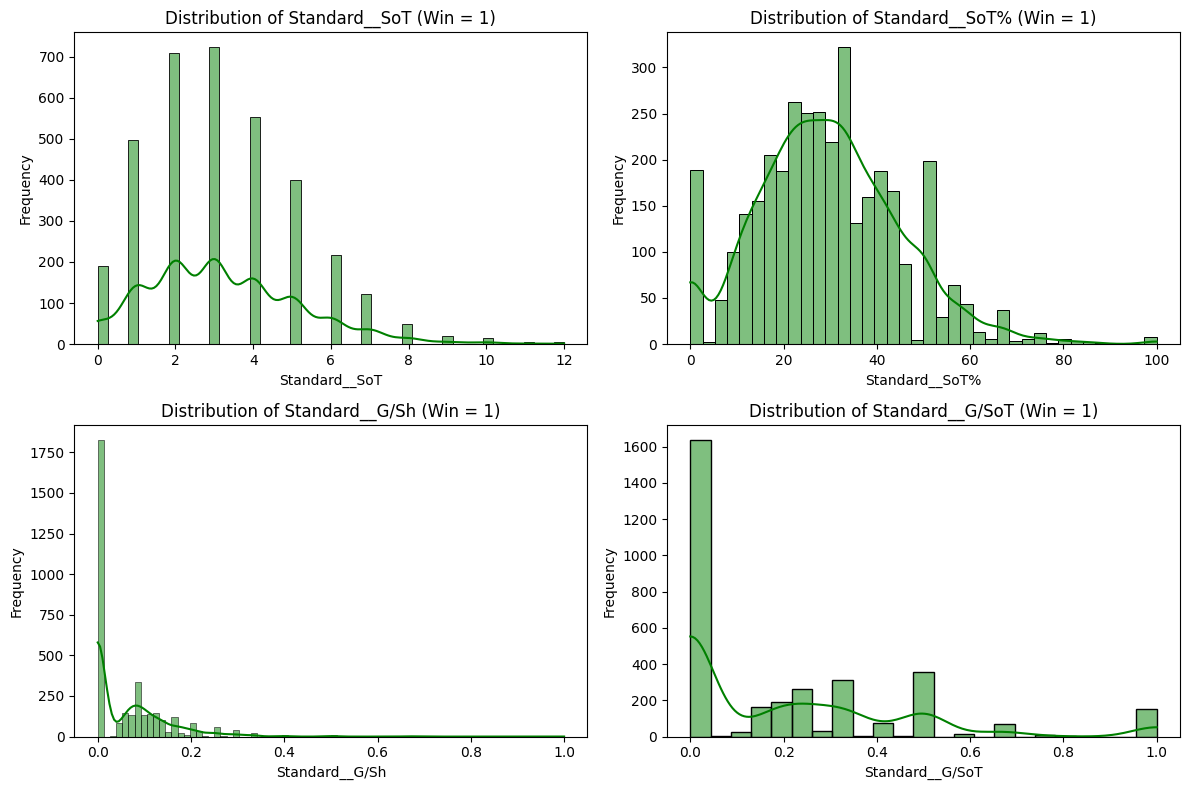

In [9]:
# Filter data for matches with Win = 1
win_matches = temp_df[temp_df['Win'] != 1]

# Create a subplot grid for Win = 1 matches
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot the distribution of each selected variable for matches with Win = 1
for i, column in enumerate(selected_columns):
    sns.histplot(win_matches[column], kde=True, ax=axes[i], color="green")
    axes[i].set_title(f"Distribution of {column} (Win = 1)")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Adjust layout for Win != 1 matches
plt.tight_layout()
plt.show()

# Distrubution of these stats for game with GF >= 1

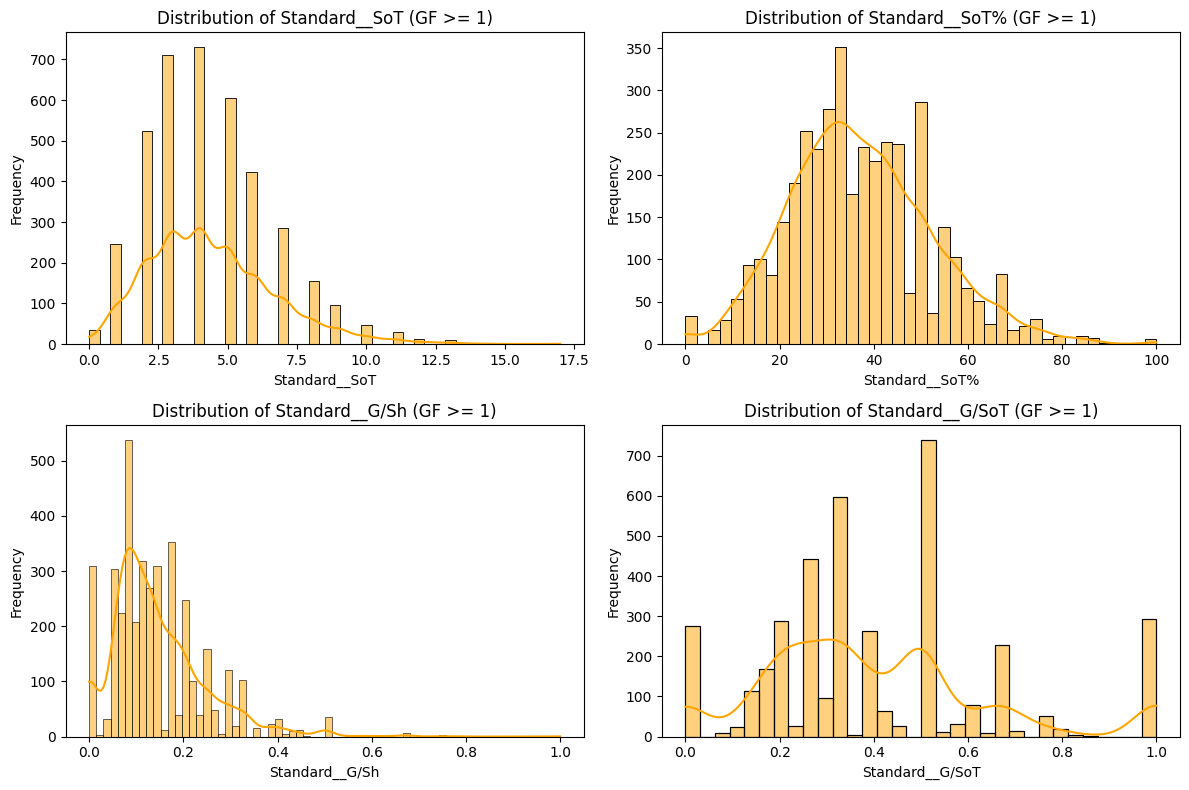

In [7]:
# Filter data for matches with GF >= 1
gf_matches = temp_df[temp_df['GF'] >= 1]

# Create a subplot grid for GF >= 1 matches
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot the distribution of each selected variable for matches with GF >= 1
for i, column in enumerate(selected_columns):
    sns.histplot(gf_matches[column], kde=True, ax=axes[i], color="orange")
    axes[i].set_title(f"Distribution of {column} (GF >= 1)")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Adjust layout for GF >= 1 matches
plt.tight_layout()
plt.show()

# Distrubution of these stats for game with GF >= 1 & game results = Win or Draw

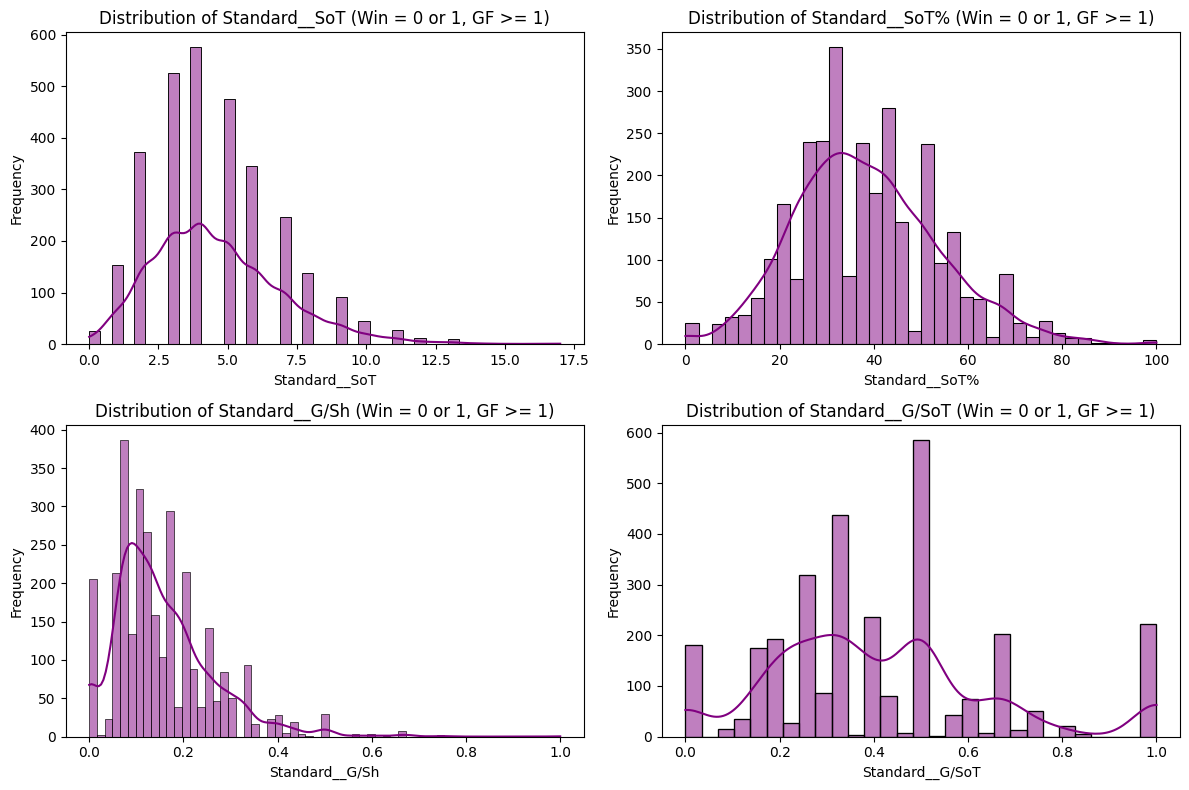

In [8]:
# Filter data for matches with Win = 0 or 1 and GF >= 1
filtered_matches = temp_df[(temp_df['Win'].isin([0, 1])) & (temp_df['GF'] >= 1)]

# Create a subplot grid for filtered matches
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Plot the distribution of each selected variable for filtered matches
for i, column in enumerate(selected_columns):
    sns.histplot(filtered_matches[column], kde=True, ax=axes[i], color="purple")
    axes[i].set_title(f"Distribution of {column} (Win = 0 or 1, GF >= 1)")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

# Adjust layout for filtered matches
plt.tight_layout()
plt.show()